# Oldjuk meg Python segítségével az alábbi Dinamika vizsgapéldát:
<img src="alk4_vizsgapelda_feladat.png" width="800">


## 1. Feladat: (1)-es és (2)-es jelű test gyorsulásállapotának meghatározása

In [1]:
import sympy as sp
sp.init_printing() # a szép kiíratásért

# Szimbólumok felvétele. Adatok még nincsenek beírva, legyen minden szimbolikusan kiszámolva először.
vB,vC,aB,R,ω1,ω2 = sp.symbols("v_B,v_C,a_B,R,ω_1,ω_2") # \varepsilon + tab; \omega + tab
R,φ = sp.symbols("R,φ")

# Az ábráról:
l = 4*R

# Mivel tiszta gördülés feltételezendő a (1)-es test esetén (átrendezve, hogy ω1 legyen kifejezve
# ismert adatokkal):
ω1 = vB/R 

⎡ 0 ⎤   ⎡-5⋅R⋅ω₂⋅sin(φ) + v_B⎤
⎢   ⎥   ⎢                    ⎥
⎢v_C⎥ = ⎢   5⋅R⋅ω₂⋅cos(φ)    ⎥
⎢   ⎥   ⎢                    ⎥
⎣ 0 ⎦   ⎣         0          ⎦

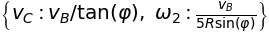

In [2]:
# A (2)-es test szögsebességének, és C pontja sebességének kiszámolása:

# `_v`-vel jelölöm azokat a mennyiségeket, amik vektorok.
vB_v = sp.Matrix([vB,0,0]) 
vC_v = sp.Matrix([0,vC,0])  # Felhasználva, hogy a fal mentén mozog a C pont.

# A fentiekben (lsd. 9. sor a cellában) `ω1` absz. értékét számítottuk ki. Az ábra alapján ez vektorosan:
ω1_v = sp.Matrix([0,0,-ω1]) 
ω2_v = sp.Matrix([0,0,ω2])

# Az `rBC` vektor a `φ` szög segítségével számítható
rBC_v = sp.Matrix([(l+R)*sp.cos(φ),(l+R)*sp.sin(φ),0])

# Sebességredukciós képlet a C pont sebességének kiszámításához.
# `sp.Eq`: egyenletet vesz fel, az argumentumban vessző választja el a bal oldali kifejezést
# a jobb oldalitól. Szimbolikus mátrixokkal (vektorokkal) is működik (ahogy látható).
eq1 = sp.Eq(vC_v,vB_v + ω2_v.cross(rBC_v)) 
display(eq1)

sol1 = sp.solve(eq1,vC,ω2)           
display(sol1) # A megoldást egy dictionary-ben kapjuk.

        ⎡                       2       ⎤
⎡ 0 ⎤   ⎢-5⋅R⋅ε₂⋅sin(φ) - 5⋅R⋅ω₂ ⋅cos(φ)⎥
⎢   ⎥   ⎢                               ⎥
⎢a_C⎥ = ⎢                      2        ⎥
⎢   ⎥   ⎢5⋅R⋅ε₂⋅cos(φ) - 5⋅R⋅ω₂ ⋅sin(φ) ⎥
⎣ 0 ⎦   ⎢                               ⎥
        ⎣               0               ⎦

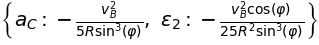

In [3]:
# Mindkét test esetében ki van fejezve a szögsebesség, és legalább 1-1 pontjuk sebessége;
# innentől a többi pontjuké is számítható.
# Határozzuk meg a (2)-es test C pontjának gyorsulását, és a test szöggyorsulását:

ε1,ε2,aB,aC,aS2 = sp.symbols("ε_1,ε_2,a_B,a_C,a_S2")

aC_v = sp.Matrix([0,aC,0]) # a fal miatt
aB_v = sp.Matrix([0,0,0])  # mivel `vB` állandó
ε2_v = sp.Matrix([0,0,ε2])

# Gyorsulásredukciós képlet:
eq2 = sp.Eq(aC_v,aB_v + ε2_v.cross(rBC_v) - ω2**2*rBC_v)
display(eq2)

# Viszont `ω2`-t már ismerjük, így annak (ismert mennyiségekkel) kifejezett formájával dolgozzunk tovább.
eq2_ism = eq2.subs(ω2,sol1[ω2]) # Kiszedve a `sol1` dictionaryből az `ω2`-re való megoldást.

sol2 = sp.solve(eq2_ism,ε2,aC) # Innen `aC` és `ε2` is ki van fejezve ismert mennyiségekkel
display(sol2)

          ⎡                       2       ⎤
⎡a_S2x⎤   ⎢-4⋅R⋅ε₂⋅sin(φ) - 4⋅R⋅ω₂ ⋅cos(φ)⎥
⎢     ⎥   ⎢                               ⎥
⎢a_S2y⎥ = ⎢                      2        ⎥
⎢     ⎥   ⎢4⋅R⋅ε₂⋅cos(φ) - 4⋅R⋅ω₂ ⋅sin(φ) ⎥
⎣  0  ⎦   ⎢                               ⎥
          ⎣               0               ⎦

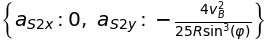

In [4]:
# A feladat azonban a súlyponti mennyiségekre kíváncsi! Ehhez meg kell határozni a (2)-es test súlypontját,
# ami nem triviális. A test áll egy `2m` tömegű korongból, valamint egy `m` tömegű rúdból. A súlypont a közös
# szimmetriatengelyen fog elhelyezkedni, és a rúd, valamint a gömb súlypontja közötti szakaszt olyan arány-
# ban osztja, mint ami a tömegek között fennáll. Ebből következik, hogy a közös súlypont a két lokális súly-
# pontot összekötő egyenes, koronghoz közelebbi harmadolópontjánál helyezkedik el. Leolvasható, hogy ez pont
# az összehegesztés pontjában található.

aS2_x,aS2_y = sp.symbols('a_S2x,a_S2y')

aS2_v = sp.Matrix([aS2_x,aS2_y,0])
rBS2_v = sp.Matrix([l*sp.cos(φ),l*sp.sin(φ),0])

# Sebességredukciós képlet:
eq3 = sp.Eq(aS2_v,aB_v + ε2_v.cross(rBS2_v) - ω2**2*rBS2_v)
display(eq3)
sol3 = sp.solve(eq3.subs([(ω2,sol1[ω2]),(ε2,sol2[ε2])]),aS2_x,aS2_y)
display(sol3)

## 2. Feladat: szabadtest ábrák, és a dinamika alaptétele

<img src="alk4_vizsgapelda_szta.png" width="800">



'---'

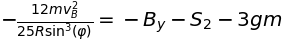

In [5]:
# (1)-es test: statika

# Hozzunk létre szimbólumokat:
S1,S2,N1,N2,Bx,By,ΘS2,m,g,M = sp.symbols('S_1,S_2,N_1,N_2,B_x,B_y,Θ_S2,m,g,M')
# Az adatok alapján:
m1 = 2*m

# A 3 vetületi egyenletet
eq_fx_1 = sp.Eq(0,S1+Bx) 
eq_fy_1 = sp.Eq(0,N1+By-m1*g)
eq_Mb_1 = sp.Eq(0,-M+S1*R)

# A másik testnek súlypontjának gyorsulása nem null vektor, így arra a dinamika alaptétele alapján:

eq_fx_2 = sp.Eq(3*m*sol3[aS2_x],-Bx-N2) # aS2_x helyett használjuk a fentebb kifejezett formáját
eq_fy_2 = sp.Eq(3*m*sol3[aS2_y],-By-S2-3*m*g) # aS2_y helyett használjuk a fentebb kifejezett formáját
eq_MS2_2 = sp.Eq(ΘS2*ε2,-Bx*l*sp.sin(φ)+By*l*sp.cos(φ)+N2*R*sp.sin(φ)-S2*(R+R*sp.cos(φ)))

display(eq_fx_1,eq_fy_1,eq_Mb_1,'---',eq_fx_2,eq_fy_2,eq_MS2_2)

## 3. Feladat: az M nyomaték pillanatnyi értéke

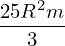

In [6]:
# Ahhoz, hogy megkapjuk `M`-met, először meg kell határozni a `ΘS2` tehetetlenségi nyomatékot.
# Ennek kiszámítása Steiner tétellel lehetséges, mely során a rúd, és a korong tehetetlenségi 
# nyomatékát kell kiszámolni a saját  súlyponti tengelyükre, majd külön-külön átszámolni őket a 
# közös súlyponti (z) tengelyre, végül összegezni.

ΘSrud = sp.Rational(1,12)*m*l**2 # Azért nem simán `1/12`, hogy megőrizzük törtként: `sp.Rational(1,12)` -> 1/12
ΘSkorong = sp.Rational(1,2)*(2*m)*R**2

# Steiner tagok:
ΘS2rud = ΘSrud + m*(l/2)**2 # Mindig a saját súlyponton átmenő tengelyre a legkisebb, így itt hozzá kell adni!
ΘS2korong = ΘSkorong + (2*m)*R**2

# Egy kis tanulság debuggoláshoz: ez -> `θ` és ez -> `Θ` nem ugyan az.. Az egyik kis theta, a másik nagy :)
# Θ -> \Theta + tab ; θ -> \theta + tab

# Mivel már egy tengelyre vannak számolva, így összegezhetőek:
ΘS2_kif= ΘS2rud + ΘS2korong
ΘS2_kif

In [7]:
# A a fenti egyenletrendszer 6 független egyenletből áll, de 7 ismeretlent tartalmaz. Kiegészítésnek
# a Coulomb súrlódást felhasználva:
μ = sp.Symbol('μ')
# S2 = μ*N2 , de írjuk fel inkább egyből sympy egyenletként
eqCoulomb = sp.Eq(S2,μ*N2)

# Kézi számítás során itt kezdődne a számolás java, de szerencsére most pythont használunk

# A keresett változókban lineáris az egyenletrendszer, így a megoldása relatíve gyors
sol = sp.solve([eq_fx_1,eq_fy_1,eq_Mb_1,eq_fx_2,eq_fy_2,eq_MS2_2,eqCoulomb],[M,S1,S2,N1,N2,Bx,By])

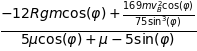

In [8]:
# Megkaptuk tehát a nyomatékot, kifejezve az adatokkal
M_sol = sol[M]
# Helyettesítsük be `ε2` és `ΘS2` helyére az adatokkal kifejezett verziójukat
M_sol = M_sol.subs([(ε2,sol2[ε2]),(ΘS2,ΘS2_kif)])
display(M_sol)

In [9]:
# Vegyünk fel egy behelyettesítési listát is az adatokból:
adatok = ([(m,3),(R,0.3),(vB,0.3),(φ,30*sp.pi/180),(μ,0.1),(g,9.81)]) # A szög radiánban kell!
M_num = M_sol.subs(adatok).evalf(5) # Nm
M_num

In [10]:
# Vizsgáljuk meg, hogy a (1)-es test tapad-e:
(sol[S1]/sol[N1]).subs([(ε2,sol2[ε2]),(ΘS2,ΘS2_kif)]).subs(adatok).evalf() < 1   # kisebb-e mint 1?

In [11]:
# Így tehát gördül az (1)-es korong.

## 4. Feladat: az M nyomaték munkavégzése

⎡    v_B     ⎤
⎢    ───     ⎥
⎢     5      ⎥
⎢            ⎥
⎢4⋅v_B⋅cos(φ)⎥
⎢────────────⎥
⎢  5⋅sin(φ)  ⎥
⎢            ⎥
⎣     0      ⎦

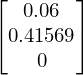

In [12]:
# A munkatételt felhasználva
# T2-T1 = W12
# Ehhez szükség van a (2)-es test súlypontjának sebességére:
vS2 = vB_v + ω2_v.cross(rBS2_v)
vS2_dat = vS2.subs(ω2,sol1[ω2]) # ω2-t már korábban kifejeztük
display(vS2_dat)
vS2_num = vS2_dat.subs(adatok).evalf(5)
vS2_num # m/s

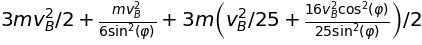

In [13]:
# Az összes kinetikus energia felírásához szükséges még `ΘA`:
ΘA = sp.Rational(3,2)*m1*R**2

T1 = sp.Rational(1,2)*ΘA*ω1**2+sp.Rational(3,2)*m*vS2_dat.dot(vS2_dat)+sp.Rational(1,2)*ΘS2_kif*sol1[ω2]**2
display(T1)
# Vektor négyzete: önmagával vett skaláris szorzata. Angolul dot product.
T1.subs(adatok) # J

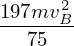

In [14]:
# Nézzük a kinetikus energiát a függőleges állapotban!
# Ekkor természetesen a testek sebességállapota változik. Függőleges állapotban a C pont épp a 
# (2)-es test sebességpólusa lesz, ezért
ω2_függ = vB/(l+R)
vS2_függ = l*ω2_függ

T2 = sp.Rational(1,2)*ΘA*ω1**2+sp.Rational(3,2)*m*vS2_függ**2+sp.Rational(1,2)*ΘS2_kif*ω2_függ**2
display(T2)
T2.subs(adatok).evalf() # J

In [15]:
# A nyomatéknak a gravitációs erő ellenében kell dolgoznia (a gravitációs erő is munkát végez), így
WM01 = T2 - T1 + 3*m*g*(l - l*sp.sin(φ))
WM01.subs(adatok) # J